# Fit plot Tc

In [7]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [8]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


### Read files

In [9]:
data_path = Path("../../../data/Extrapolation").resolve()
file_one = 'inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_extrapol_values.csv'
file_two = 'inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_with_nv-1_extrapol_values.csv'
df_e_v = pd.read_csv(os.path.join(data_path,file_one),index_col=0)
df_e_v_with_one = pd.read_csv(os.path.join(data_path,file_two),index_col=0)

In [10]:
y_data = 1/df_e_v.loc['infty'].values
y_data_with_one = 1/df_e_v_with_one.loc['infty'].values

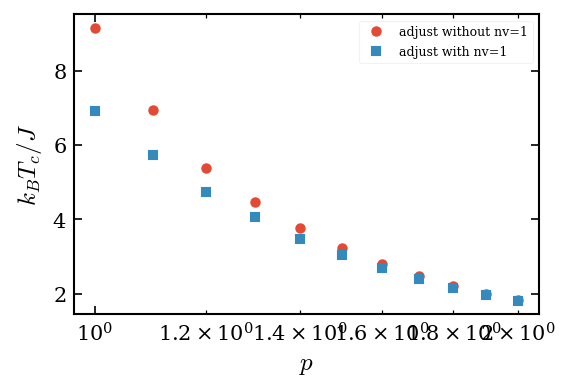

In [11]:
file_name_base = 'inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms'
path_save_graph = Path("../../graphs/").resolve()
file_extrapol_graph = os.path.join(path_save_graph,'Extrapolation',file_name_base+'all_p_two_graphs_semi_log.png')
# data 
x_data = np.arange(1,2.1,0.1)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

# ax.plot(x_data, y_data, marker="o", lw=0,color='C0',label='adjust without nv=1')
# ax.plot(x_data, y_data_with_one, marker="s", lw=0,color='C1', label='adjust with nv=1')
ax.semilogx(x_data, y_data, marker="o", lw=0,color='C0',label='adjust without nv=1')
ax.semilogx(x_data, y_data_with_one, marker="s", lw=0,color='C1', label='adjust with nv=1')

ax.legend()


ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$k_BT_c/J$")

pyplot.draw()

# print('Save graph {}'.format(file_extrapol_graph))
# pyplot.savefig(file_extrapol_graph)

pyplot.show()

In [6]:
import numpy as np
1/np.arange(1,26,1)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ])